In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt 
import string 
from nltk.corpus import stopwords
import nltk 
nltk.download('stopwords')
from nltk.stem import PorterStemmer   # this is used to make into the root words !! 
ps = PorterStemmer()






In [ ]:
# // read the data set from downloaded document   give its path !!

document = pd.read_csv("/home/N3xthar-Voryx/Spam_SMS_Detection/data/spam.csv", encoding = 'latin1')



In [ ]:
document.sample(10)

In [ ]:
document.shape

In [ ]:
document.shape

In [ ]:
# # now the real work stars !! 
#  we have to do the real following steps for machine too learn quick and efficently 
# 1 }  Data cleaning 
# 2 } EDA (Exploratory Data anlysis {meaning ananlysis the data in the  underlying pattern })
# 3 } Model building 
# 4 }  evaluationn 
# 5 } improvement !!! 
# 6 } deploy !!! 


1 }  DATA CLEANING 

In [ ]:
document.info()    # this give all the information regarding the data !!! 

In [ ]:

document.sample

In [ ]:
# // there are three waste column which is waste we have to delete it !! 
document = document.drop('Unnamed: 3',axis = 1)


In [ ]:
document.sample(10)

In [ ]:
# // now remove the unnamed column 2 and 4 at once !!
document = document.drop(['Unnamed: 2', 'Unnamed: 4' ],  axis = 1 )    # axis = 1  for the row while the axis = 0 for column  

In [ ]:
print(document.columns)

In [ ]:
document.sample(10)
document.shape

In [ ]:
# // rename the column  for our easeee 
document = document.rename(columns = {'v1' : "OUTPUT", 'v2' : "INPUT"})

In [ ]:
document.head()

In [ ]:
encoder = LabelEncoder()      #   // making the object for using the LabelEncoder's fit_transformer attribute !!! 

In [ ]:
document['OUTPUT'] = encoder.fit_transform(document['OUTPUT'])  # machine did not understand the text so you have to convert into the number !! 

In [ ]:
document.sample(10)

In [ ]:
# // now we have to check the missing null value and than count it !! 
document.isnull().sum()

# // if null value exist than you have to remove by this function of the python !! document.dropna(how='all')

In [ ]:
# // now we have to check the duplicate value in the data 
document.duplicated().sum()

#you can remove the duplicate iteam by this !! 
document.drop_duplicates(keep = 'first' , inplace = True ) 

# // 403 duplicate data found we have to remove it 


In [ ]:
# // reverify there is any duplicate data is present of not 
document.duplicated().sum()

# to check where is my file is going to save !! 

# import os
# print(os.getcwd())



In [ ]:
 # to save the clear data is i have to use after some time 
# document.to_csv('cleaned_data.csv' ,index = False)


# STEP  2 EDA [ EXPLORATORY DATA ANALYSIS !! ] 

In [ ]:
document.sample(10)     # 0 for hamp and 1 for not the spam !! 

In [ ]:
## check how many rows has spam and the hamp for the clarification !! 
document['OUTPUT'].value_counts()


In [ ]:
# 4516 are not spam messages whilel 653 are the spam messages !! 
# lest observe using the charts !! 

plt.pie(document['OUTPUT'].value_counts(), labels=['ham', 'spam'], autopct = "%0.3f" )
plt.show()

# There is a lot of variation in the data bosss 

In [ ]:
import nltk 
nltk.download('punkt')

In [62]:
document.sample(10)

,OUTPUT,INPUT,Total_Character,Total_word,Total_sentence,Modified_Data
546,0,I know but you need to get hotel now. I just g...,149,35,3,know need get hotel got invit apologis cali sw...
5522,0,Thats cool. I want to please you...,35,9,2,that cool want pleas
3281,0,Hey you around? I've got enough for a half + t...,62,17,2,hey around got enough half ten owe
4580,0,Not course. Only maths one day one chapter wit...,75,17,2,cours math one day one chapter one month finish
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
3354,0,Minimum walk is 3miles a day.,29,7,1,minimum walk 3mile day
2952,1,"URGENT! Your mobile was awarded a å£1,500 Bonu...",120,23,4,urgent mobil award bonu caller prize final att...
3668,0,Yeah imma come over cause jay wants to do some...,52,11,1,yeah imma come caus jay want drug
2795,0,Tell your friends what you plan to do on Valen...,69,19,1,tell friend plan valentin day lt url gt
5272,0,Hello.How u doing?What u been up 2?When will u...,152,40,3,u u 2 u b move flat co need arrang pick lamp e...


In [63]:
#check how many letter in our input data  we are making a column and then out into them !! 

document['Total_Character'] = document['INPUT'].apply(len)


In [64]:
document.sample(10)

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /home/N3xthar-
[nltk_data]     Voryx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/N3xthar-
[nltk_data]     Voryx/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [65]:
# // now i want to calculate the number of character in the line !!
# count the number of words !! 
## now making the function for for counting the number of words in the input !! 

def word_count (text):
    return len(nltk.word_tokenize(text)) 

document['Total_word'] = document['INPUT'].apply(word_count) 

In [66]:
document.sample(10)

,OUTPUT,INPUT,Total_Character,Total_word,Total_sentence,Modified_Data
2957,1,U have a secret admirer. REVEAL who thinks U R...,147,32,6,u secret admir reveal think u r special call o...
5495,0,"Good afternoon, my love ... How goes your day ...",118,29,4,good afternoon love goe day sleep hope well bo...
5294,1,XMAS iscoming & ur awarded either å£500 CD gif...,157,24,1,xma iscom ur award either cd gift voucher free...
5302,0,About &lt;#&gt; bucks. The banks fees are fix...,87,25,3,lt gt buck bank fee fix better call bank find
5017,0,Babe ! What are you doing ? Where are you ? Wh...,152,40,8,babe talk think good boy miss love
1079,0,Me too watching surya movie only. . .after 6 p...,67,14,3,watch surya movi 6 pm vijay movi pokkiri
5229,0,It means u could not keep ur words.,35,9,1,mean u could keep ur word
2748,0,Send his number and give reply tomorrow mornin...,89,18,1,send number give repli tomorrow morn said like ok
3160,0,Mystery solved! Just opened my email and he's ...,87,20,3,mysteri solv open email sent anoth batch sweeti
1689,0,Bring tat cd don forget,23,5,1,bring tat cd forget


In [67]:
# now i wanted to count the number of ssentence in the for understanding the data !!! 

def sentence_count (text):
    return len(nltk.sent_tokenize(text))

document['Total_sentence'] = document['INPUT'].apply(sentence_count)

In [68]:
document.sample(10)

,OUTPUT,INPUT,Total_Character,Total_word,Total_sentence,Modified_Data
1317,1,Win the newest ÛÏHarry Potter and the Order o...,140,30,1,win newest potter order phoenix book 5 repli h...
129,0,K..k:)how much does it cost?,28,11,1,k k much cost
1248,0,HI HUN! IM NOT COMIN 2NITE-TELL EVERY1 IM SORR...,152,33,2,hi hun im comin every1 im sorri 4 hope u ava g...
2591,0,Still work going on:)it is very small house.,44,12,1,still work go small hous
2947,0,Nope but i'll b going 2 sch on fri quite early...,87,24,1,nope b go 2 sch fri quit earli lor co my si go...
3282,0,Hey tmr maybe can meet you at yck,33,8,1,hey tmr mayb meet yck
3551,0,Lol u still feeling sick?,25,6,1,lol u still feel sick
930,0,I'm really sorry i won't b able 2 do this frid...,106,26,1,realli sorri wo b abl 2 u find yr term go ok
948,0,Chk in ur belovd ms dict,24,6,1,chk ur belovd ms dict
299,0,Need a coffee run tomo?Can't believe it's that...,67,16,1,need coffe run tomo ca believ time week alreadi


In [69]:
# now i want a explanatation for the all the data of spam and the hyms !!! 

# ham   0 for the ham !!! 
document[document['OUTPUT']== 0 ][['Total_Character','Total_word','Total_sentence']].describe()   # this is the observation for the  not a 



,Total_Character,Total_word,Total_sentence
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [70]:
# SPAM !!   1 is for the spam !!! 

document[document['OUTPUT']== 1 ][['Total_Character','Total_word','Total_sentence']].describe() 

,Total_Character,Total_word,Total_sentence
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='Total_Character', ylabel='Count'>

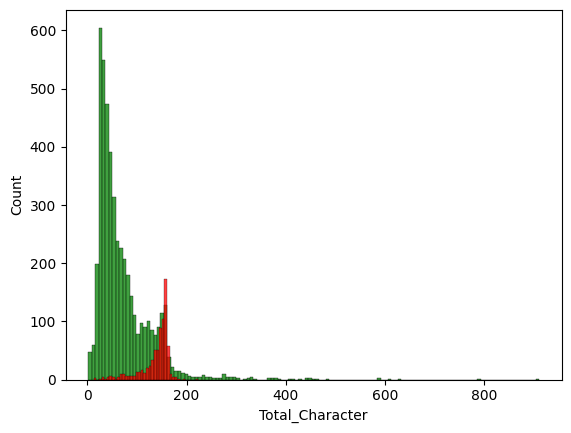

In [71]:
# // now we are visualizing the data in the more effective way so that we can compare each asspect of the data efficiently brotherrr !!! 

import seaborn as sns 
# now seee the varitation of the data is  the length  is usefull to find the  spam or ham,  thinking point is the long message is spam or not !!


# compare the total character !!   between the spam and the ham !! 

sns.histplot(document[document['OUTPUT']==0]['Total_Character'], color = 'green')
sns.histplot(document[document['OUTPUT']==1]['Total_Character'], color = 'red')


<Axes: xlabel='Total_word', ylabel='Count'>

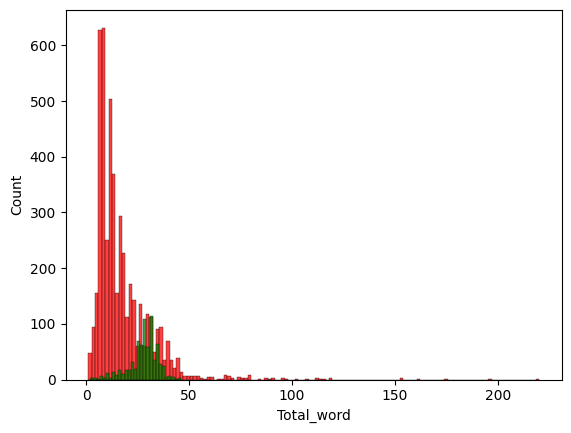

In [72]:

# compare the total words !!   between the spam and the ham !! 

sns.histplot(document[document['OUTPUT']==0]['Total_word'], color = 'red')
sns.histplot(document[document['OUTPUT']==1]['Total_word'], color = 'green')

<Axes: xlabel='Total_sentence', ylabel='Count'>

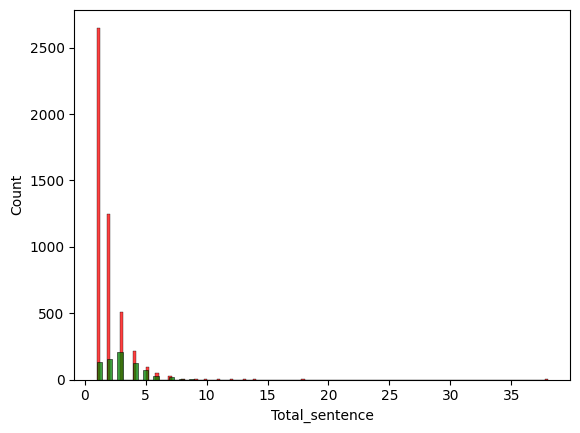

In [73]:

# compare the total sentences  !!   between the spam and the ham !! 

sns.histplot(document[document['OUTPUT']==0]['Total_sentence'], color = 'red')
sns.histplot(document[document['OUTPUT']==1]['Total_sentence'], color = 'green')

In [74]:
# // from the observation of the graph we can clearly say that spam messages are often longer one !! 



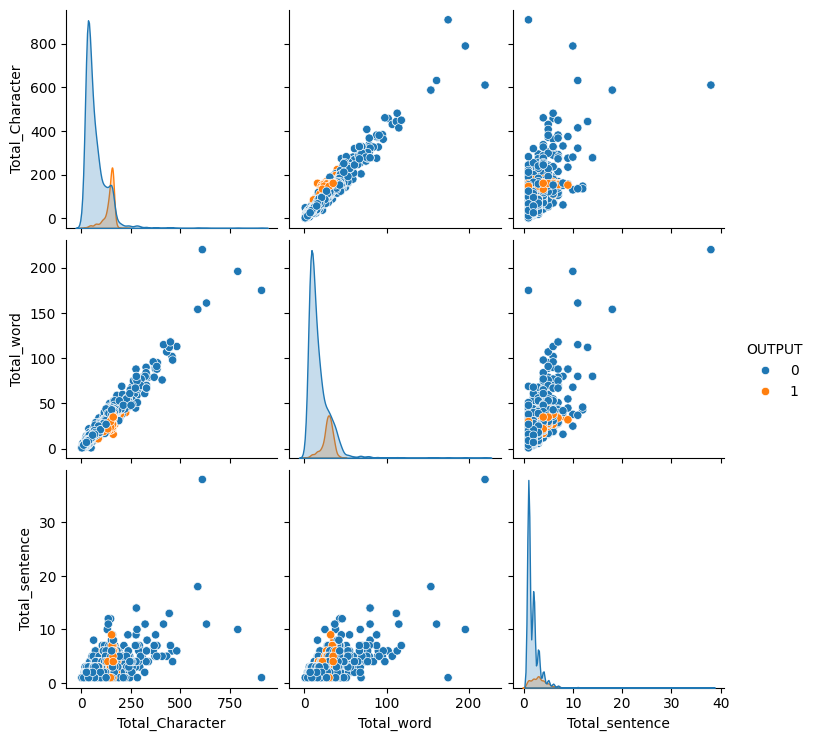

In [75]:
sns.pairplot(document,hue='OUTPUT')

STEP 3 ) DATA PROCESSING !! 

# 1 ) to convert into the lower case !! 
# 2)  Tokenization = Splitting text into words or tokens.
# 3)  remove the special character !! 
# 4 ) remove the stop word and the punctutation 
# 5) stemming :== converting  the words into his  root form 

In [76]:
# make the function to convert into the lower case !! 

def Transform_text (text):
    text = text.lower() 
    text = nltk.word_tokenize(text)    # spilt the sentence into the list of words that has words punctutaion 
    #create the empty list and append the word and letter only not the special character we use inbuilt method isalnum()
    l = []
    for i in text :
        if (i.isalnum()):   # no need to right ==True if the statement id   true than it do the forward work  else did not do the forward work !! 
            
            l.append(i)

    # now put the l into the text container !! 
    text = l[:]

    # // now clear for not using the extra memeory  so that we can reuse it !! !!
    l.clear()

     # now i have to remove the special characters  and also remove the stopwords  !!

    for i in text :
        if i not in string.punctuation and i not in stopwords.words('english') :
            l.append(i)


    text = l[:]

    l.clear()

    # now remove the stem words !! 
  
    # now convert into the stem words !!! 
    for i in text :
        l.append(ps.stem(i))
    text = l[:]
    l.clear()

    # now give all the data in the list now need in the full words !! we use the join function 
    return " ".join(text)

Transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
    
            

'gon na home soon want talk stuff anymor tonight k cri enough today'

# 

In [77]:
# now make a row for the modified text row !! 
document['Modified_Data'] = document['INPUT'].apply(Transform_text)

In [78]:
document.sample(10)

,OUTPUT,INPUT,Total_Character,Total_word,Total_sentence,Modified_Data
4803,0,"Er, hello, things didnÛ÷t quite go to plan Û...",114,23,1,er hello thing quit go plan limp slowli home f...
3188,0,X2 &lt;#&gt; . Are you going to get that,41,15,2,x2 lt gt go get
592,1,PRIVATE! Your 2003 Account Statement for 07753...,148,24,3,privat 2003 account statement 07753741225 show...
5182,0,I sent them. Do you like?,25,8,2,sent like
4330,0,Nope i'll come online now..,27,7,1,nope come onlin
400,1,FREE RINGTONE text FIRST to 87131 for a poly o...,158,35,3,free rington text first 87131 poli text get 87...
4850,0,Gain the rights of a wife.dont demand it.i am ...,76,14,1,gain right demand tri husband see
321,0,Hey... Why dont we just go watch x men and hav...,62,15,1,hey dont go watch x men lunch haha
5385,0,How do friends help us in problems? They give ...,147,27,2,friend help us problem give stupid suggest lan...
3016,0,One of the joys in lifeis waking up each daywi...,127,22,1,one joy lifei wake daywith thought somewhereso...


In [79]:
# now we can view the text in the most spam words and the most ham words !! using the wordcloud libraray !! 
!pip install wordcloud






In [80]:
from wordcloud import WordCloud
wc = WordCloud(height = 600 , width = 600 , background_color = 'white' )


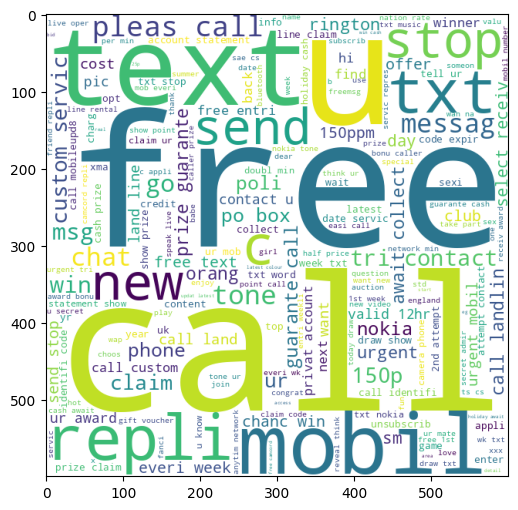

In [81]:
# Combine all Modified_Data text for OUTPUT==1 into a single string first
text_data = document[document['OUTPUT'] == 1]['Modified_Data'].str.cat(sep=" ")

# Generate word cloud from this combined string
spam_img = wc.generate(text_data)

# Plotting the word cloud
plt.figure(figsize=(15,6))
plt.imshow(spam_img)

plt.show()


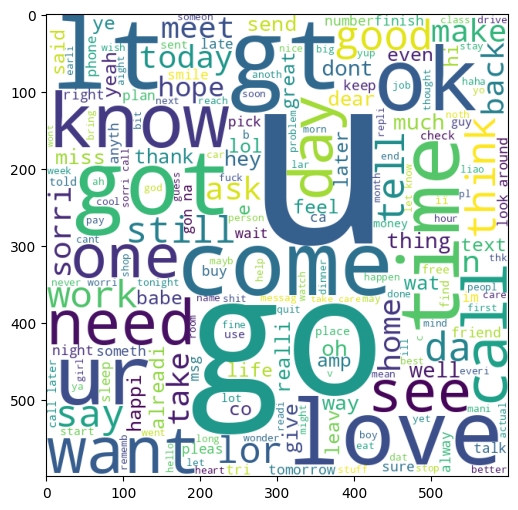

In [82]:
# Combine all Modified_Data text for OUTPUT==1 into a single string first
text_data = document[document['OUTPUT'] == 0 ]['Modified_Data'].str.cat(sep=" ")

# Generate word cloud from this combined string
ham_image  = wc.generate(text_data)

# Plotting the word cloud
plt.figure(figsize=(15,6))
plt.imshow(ham_image)

plt.show()


In [83]:

document.sample(15)

,OUTPUT,INPUT,Total_Character,Total_word,Total_sentence,Modified_Data
259,0,IÛ÷m parked next to a MINI!!!! When are you c...,74,20,2,park next mini come today think
1496,0,I'm always on yahoo messenger now. Just send t...,158,38,3,alway yahoo messeng send messag get may send m...
4021,0,U gd lor go shopping i got stuff to do. U wan ...,89,23,3,u gd lor go shop got stuff u wan 2 watch infer...
3627,0,Meeting u is my work. . . Tel me when shall i ...,65,17,4,meet u work tel shall work tomorrow
915,0,I could ask carlos if we could get more if any...,67,15,1,could ask carlo could get anybodi els chip
3741,0,Hey i'm bored... So i'm thinking of u... So wa...,58,18,3,hey bore think u wat r u
1416,0,No..few hours before.went to hair cut .,39,9,1,hour hair cut
1612,1,RT-KIng Pro Video Club>> Need help? info@ringt...,153,27,3,pro video club need help info call 08701237397...
3640,1,You can stop further club tones by replying \S...,128,24,4,stop club tone repli see html term club tone c...
4359,0,"Night sweet, sleep well! I've just been to see...",117,27,3,night sweet sleep well see exorc emili rose ma...


In [84]:
# let analysis the frequency of words ,totol ham words 
number_of_ham_words  = []
for i in document[document['OUTPUT']==0]['Modified_Data'].tolist():
    for words in i.split():
        number_of_ham_words.append(words)
        
    

In [85]:
# print the length of the total ham  words ! 
len(number_of_ham_words)


38221

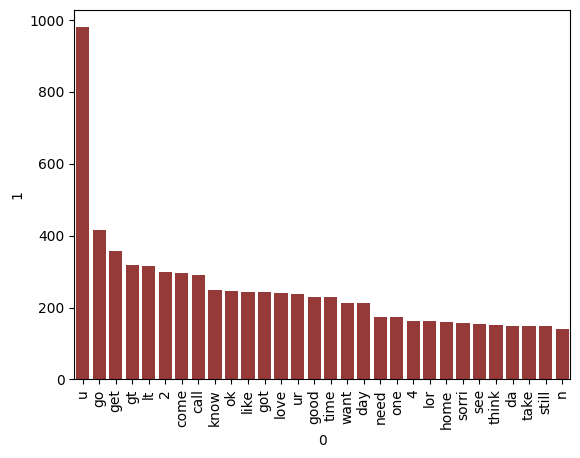

In [86]:
# now plot the graph of most repeated words in the ham  !! 
from collections import Counter 
counter_df = pd.DataFrame(Counter(number_of_ham_words).most_common(30))

sns.barplot(x=counter_df[0], y=counter_df[1], color = 'brown')
plt.xticks(rotation='vertical')
plt.show()



In [87]:
# let analysis the frequency of words ,total spam words !! 
number_of_spam_words  = []
for i in document[document['OUTPUT']==1]['Modified_Data'].tolist():
    for words in i.split():
        number_of_spam_words.append(words)

# print the length of the total spam  words ! 
len(number_of_spam_words)
  

11490

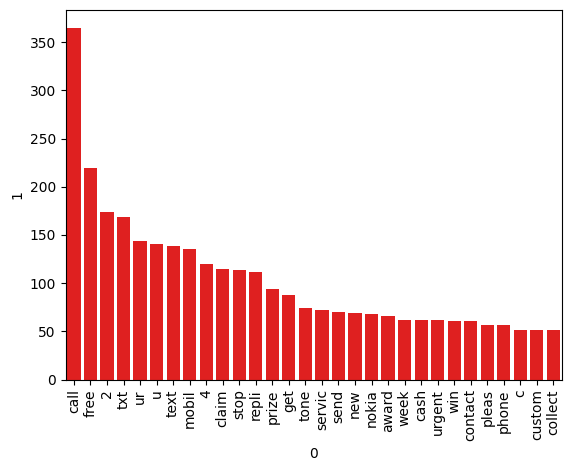

In [88]:
# now plot the graph of most repeated words in the spam  !! 
spam_list = pd.DataFrame(Counter(number_of_spam_words).most_common(30))
sns.barplot(x = spam_list[0],y = spam_list[1], color = 'red')
plt.xticks(rotation = 'vertical')
plt.show()

MODEL BUILDING 

In [89]:
# we need to vectorize it first :-- `Vectorization is the process of converting text or data into numerical vectors so that machine learning algorithms can process them.
# 1 }  One-Hot Encoding
#2 } Bag of Words (BoW)  :==Counts how many times each word occurs in a document.  Simple frequency count
# 3 } TF-IDF (Term Frequency-Inverse Document Frequency) improve bag of words by reducing the frequency of the commoon words eg (the etc !! )
# 4 } 4. Word Embeddings
# These are dense vector representations capturing semantic meaning:

# ✅ (a) Word2Vec

# Uses neural networks (CBOW or Skip-Gram) to embed words based on context.

# Example: “king” - “man” + “woman” ≈ “queen”

# ✅ (b) GloVe (Global Vectors)

# Uses global word co-occurrence statistics to produce embeddings.

# ✅ (c) FastText

# Similar to Word2Vec but uses subword information (good for rare words).

# 🔥 Advantages of embeddings: Capture meaning, context, relationships.

# 5. Sentence Embeddings / Document Embeddings
# Convert entire sentences or documents into a single dense vector.

# Examples:

# Doc2Vec

# Universal Sentence Encoder (USE)

# BERT-based embeddings

# These are useful for classification, similarity, and NLP downstream tasks.


In [90]:
document.sample(10)

,OUTPUT,INPUT,Total_Character,Total_word,Total_sentence,Modified_Data
4918,0,Re your call; You didn't see my facebook huh?,45,12,1,call see facebook huh
2518,0,Joy's father is John. Then John is the NAME of...,67,17,3,joy father john john name joy father mandan
114,0,"Wa, ur openin sentence very formal... Anyway, ...",143,34,3,wa ur openin sentenc formal anyway fine juz tt...
5217,0,Well thats nice. Too bad i cant eat it,38,10,2,well that nice bad cant eat
1511,0,Oops sorry. Just to check that you don't mind ...,110,26,3,oop sorri check mind pick tomo half eight stat...
1698,1,"Free msg. Sorry, a service you ordered from 81...",148,31,3,free msg sorri servic order 81303 could deliv ...
2638,0,Am in gobi arts college,23,5,1,gobi art colleg
5333,0,Neither [in sterm voice] - i'm studying. All f...,125,32,5,neither sterm voic studi fine sure thing resol...
3932,0,"Playin space poker, u?",22,6,1,playin space poker u
3051,0,Please leave this topic..sorry for telling that..,49,10,1,pleas leav topic sorri tell


method 01 using the bag of words !! 

In [106]:
# now vectorization using the bag of words !!
from sklearn.feature_extraction.text import CountVectorizer
bag_of_word_vect = CountVectorizer()
x  = bag_of_word_vect.fit_transform(document['Modified_Data'].tolist())  # is  the column of modified data !!! for apply the train test !! 

x.shape    # tells us (number of rows, number of columns)

# now select the output column for test and the train our model !! 
y = document['OUTPUT'].values
y

# for viewing the matrix only !! 

 # doing only for viewing the data and nothing much you can skip it !! ✔️ get_feature_names_out() gives you the list of all words that became columns in your Bag of Words model.
bow_df = pd.DataFrame(
    x.toarray(),  # converts sparse matrix to dense array
    columns=bag_of_word_vect.get_feature_names_out()  # sets column names as feature names
)
# bow_df
# print(bow_df.head())







In [92]:
from sklearn.model_selection import train_test_split


In [93]:
x_trained_data ,x_test_data ,  y_trained_data , y_test_data =  train_test_split(x,y , random_state = 1 , test_size = 0.2)

In [94]:
# # some learning points 

# ✅ What is Naive Bayes?
# ✔️ ✅ “Naive Bayes is a machine learning classification algorithm from sklearn’s naive_bayes module.”.
# ✔️ Used widely in text classification, spam detection, sentiment analysis, etc.

                                                # 🔑 1. GaussianNB


# Use case: When your features are continuous and follow a Gaussian (Normal) distribution.

# Example: Classifying Iris flower species based on petal and sepal measurements.

# 🔍 Example code:
# python
# Copy
# Edit
# from sklearn.naive_bayes import GaussianNB
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split

# # Load Iris data
# iris = load_iris()
# X = iris.data
# y = iris.target

# # Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train GaussianNB
# model = GaussianNB()
# model.fit(X_train, y_train)

# # Predict
# y_pred = model.predict(X_test)
# print(y_pred)


                                            # 🔑 2. MultinomialNB




# Use case: When your features are counts/frequencies (e.g. Bag of Words in text data).

# Example: Spam vs Ham classification in SMS using Bag of Words vectors.

# 🔍 Example code:
# python
# Copy
# Edit
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import CountVectorizer

# # Sample data
# texts = ["I love ML", "ML is great", "spam spam spam"]
# labels = [0, 0, 1]

# # Vectorize
# vect = CountVectorizer()
# X = vect.fit_transform(texts)

# # Train MultinomialNB
# model = MultinomialNB()
# model.fit(X, labels)

# # Predict
# print(model.predict(X))
                                                



                                                # 🔑 3. BernoulliNB





# Use case: When your features are binary values (0 or 1), e.g. word present or not present.

# Example: Spam detection with binary word presence vectors.

# 🔍 Example code:
# python
# Copy
# Edit
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.feature_extraction.text import CountVectorizer

# # Sample data
# texts = ["buy now", "limited offer", "hello friend"]
# labels = [1, 1, 0]

# # Vectorize with binary=True
# vect = CountVectorizer(binary=True)
# X = vect.fit_transform(texts)

# # Train BernoulliNB
# model = BernoulliNB()
# model.fit(X, labels).

# # Predict
# print(model.predict(X))
# ✅ Where do these come from?
# ✔️ These classes come from:
# 📁 scikit-learn library → sklearn.naive_bayes module







# 🚀 Summary
# Class	Use when features are	Example use case

# GaussianNB	Continuous (real numbers, normal distribution)	Iris classification
# MultinomialNB	Counts/frequencies	Text classification with Bag of Words
# BernoulliNB	Binary (0/1)	Text classification with binary word presence


In [95]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB

In [96]:
# # NOTES TIME  !!!
    #                                            1️⃣ accuracy_score
# ✅ Meaning:
# Measures how many predictions were correct out of total predictions.

# ​
 
# Example:
# If you have 100 predictions, and 90 are correct:

# python
# Copy
# Edit
# accuracy_score(y_true, y_pred) = 0.9
# ✔️ Use case:
# Basic metric for classification problems.




                                        # 2️⃣ confusion_matrix



# ✅ Meaning:
# Gives you a table (matrix) showing correct and incorrect predictions in detail.

# For binary classification (spam vs ham):
# Predicted Positive	Predicted Negative
# Actual Positive	True Positive (TP)	False Negative (FN)
# Actual Negative	False Positive (FP)	True Negative (TN)

# 🔍 Example output:

# python
# Copy
# Edit
# confusion_matrix(y_true, y_pred)
# returns

# lua
# Copy
# Edit
# [[50  2]
#  [ 5 43]]
# ✔️ This means:

# 50 True Negatives

# 2 False Positives

# 5 False Negatives

# 43 True Positives




                                                    # 3️⃣ precision_score




# ✅ Meaning:
# Measures how many of your positive predictions were actually correct.


# ✔️ High precision means few false positives.

# Example:
# If your model predicted 10 positives, and 7 were actually positive:

# python
# Copy
# Edit
# precision_score(y_true, y_pred) = 0.7
# ⚡ Where do they come from?
# ✔️ They are from sklearn.metrics module in the scikit-learn library.



                                                    # 🚀 Summary Table



# Metric	Meaning	Use case
# accuracy_score	% of total correct predictions	Overall model performance
# confusion_matrix	Detailed table of TP, FP, FN, TN	Analyzing classification errors
# precision_score	% of positive predictions that were correct	Important in spam detection, medical diagnosis, etc.

IndentationError: unexpected indent (1918587679.py, line 2)

# making the object of the machine learning modules !! 

In [98]:
gnb = GaussianNB() 
mnb = MultinomialNB()
bnb = BernoulliNB()
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [99]:
gnb.fit(x_trained_data.toarray(),y_trained_data)
y_pred1 = gnb.predict(x_test_data.toarray())
print(accuracy_score(y_test_data,y_pred1))
print(confusion_matrix(y_test_data,y_pred1))
print(precision_score(y_test_data,y_pred1))

0.8708520179372198
[[842 134]
 [ 10 129]]
0.49049429657794674


In [100]:
# the precission is very bad we cannot use this as our working model !! 
# moving to the  next ml model that is mnb (Multinomial Naive Bayes )

multinomial naybe byse algorithium 

In [101]:
mnb.fit(x_trained_data.toarray() , y_trained_data)
y_pred2  =mnb.predict(x_test_data.toarray())
print(accuracy_score(y_test_data,y_pred2))
print(confusion_matrix(y_test_data,y_pred2))
print(precision_score(y_test_data,y_pred2))

0.979372197309417
[[961  15]
 [  8 131]]
0.8972602739726028


In [ ]:
# quite good improvemnt !!! far better than the gnb 


# now the third one !! bnb model


In [102]:
bnb.fit(x_trained_data.toarray() , y_trained_data)
y_pred3  =bnb.predict(x_test_data.toarray())
print(accuracy_score(y_test_data,y_pred3))
print(confusion_matrix(y_test_data,y_pred3))
print(precision_score(y_test_data,y_pred3))

0.9775784753363229
[[973   3]
 [ 22 117]]
0.975


In [104]:
# checking the f1 score of all the model from sklearn.metrics import f1_score
from sklearn.metrics import f1_score  # <-- Import here

# Now use it safely
f1_gnb = f1_score(y_test_data, y_pred1)
print("F1-score for GaussianNB:", f1_gnb)

f1_mnb = f1_score(y_test_data, y_pred2) 
print("F1-score for MultinomialNB:", f1_mnb)

f1_bnb = f1_score(y_test_data, y_pred3)
print("F1-score for BernoulliNB:", f1_bnb)


F1-score for GaussianNB: 0.6417910447761194
F1-score for MultinomialNB: 0.9192982456140351
F1-score for BernoulliNB: 0.9034749034749034


from this we can say we need to improve  our models acuracy and precision close to the 99 percent so we are using different vectorization , hoping we get the best result !! 


In [ ]:
# vectorization notes !! 
# 1. Bag of Words (Count Vectorizer)
# 🔹 What it does:
# Converts text into a matrix of token counts (word frequencies).

# 🔹 Pros:

# Simple

# Works well for basic models like Naive Bayes

# 🔹 Cons:

# No information about word importance

# Cannot capture context or meaning

# ### ✅ 2. TF-IDF (Term Frequency – Inverse Document Frequency)
# 🔹 What it does:
# Weights each word based on how frequently it appears in one document compared to all documents.

# 🔹 Why it is better than Bag of Words:

# Reduces importance of common words (“the”, “and”)

# Highlights informative words unique to specific texts

# 🔹 Usage:
# Recommended for spam detection models to improve precision and recall.

# ### ✅ 3. N-Grams
# 🔹 What it does:
# Captures sequences of n words (e.g. bigrams, trigrams) instead of single words.

# 🔹 Why useful:

# Captures phrases (e.g. “free offer”) which are strong spam indicators

# Improves model ability to detect context patterns

# 🔧 Use with CountVectorizer or TF-IDF:

# python
# Copy
# Edit
# TfidfVectorizer(ngram_range=(1,2))
# ### ✅ 4. Word Embeddings (Word2Vec, GloVe)
# 🔹 What it does:
# Converts words into dense vector representations capturing semantic meaning.

# 🔹 Why useful:

# Similar words have similar vectors

# Models can understand meaning, not just frequency

# 🔹 Cons:

# Requires pretrained models or training embeddings

# Needs neural networks for best use

# ### ✅ 5. Document Embeddings (Doc2Vec)
# 🔹 What it does:
# Represents entire sentences/documents as single vectors with semantic meaning.

# 🔹 Use case:
# Good for advanced spam detection pipelines with neural networks.

# ### ✅ 6. Transformer-based Embeddings (BERT, DistilBERT, RoBERTa)
# 🔹 What it does:
# Provides contextual embeddings, understanding word meaning based on sentence context.

# 🔹 Why it is state-of-the-art:

# Captures full meaning and syntax

# Excellent accuracy and precision in spam detection

# 🔹 Cons:

# Requires GPU for fast training/inference

# Complex to deploy compared to TF-IDF + Naive Bayes

# ### ✅ 7. Hashing Vectorizer
# 🔹 What it does:
# Converts words to feature indices using hashing, avoiding storing vocabulary.

# 🔹 Pros:

# Memory efficient

# Fast for large datasets

# 🔹 Cons:

# Loses interpretability (no feature names)

# Possible hash collisions



# Which to choose for better accuracy & precision in spam detection?
# Method	When to use
# Bag of Words	For quick baseline with Naive Bayes
# TF-IDF	For traditional ML models, improves performance
# N-Grams + TF-IDF	For capturing phrases and spam patterns
# Word Embeddings	For neural networks (LSTM, CNN)
# Doc2Vec	For document-level classification with neural networks
# BERT/Transformers	For best performance, production-level spam detection
# Hashing Vectorizer	For large scale fast training pipelines



now for the vectorization we are choosing the TF-IDF with n-grams !!! because the tf-idf weight the importance words and reduce the weight of common words and n gram i used because :== Captures phrases like “free offer”, “limited time” which are spam indicators 

method 02 using the TF-IDF vectorizer using the n-grams !! 

In [176]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1,3), max_features=10000, min_df=2)
  # here i am use the ngram !! , hoping the best precison and the accuracy !! 
# Using higher n-grams (e.g. (1,3)) to capture more context

# Limiting max_features (e.g. 5000) to reduce noise

# Setting min_df (minimum document frequency) to remove rare words

x = tfidf_vect.fit_transform(document['Modified_Data'].tolist())
x.shape    # tells us (number of rows, number of columns)

# now select the output column for test and the train our model !! 
y = document['OUTPUT'].values
x_trained_data ,x_test_data ,  y_trained_data , y_test_data =  train_test_split(x,y , random_state = 1 , test_size = 0.2)
from sklearn.model_selection import train_test_split

In [177]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
gnb = GaussianNB() 
mnb = MultinomialNB()
bnb = BernoulliNB()
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [178]:
gnb.fit(x_trained_data.toarray(),y_trained_data)
y_pred1 = gnb.predict(x_test_data.toarray())
print(accuracy_score(y_test_data,y_pred1))
print(confusion_matrix(y_test_data,y_pred1))
print(precision_score(y_test_data,y_pred1))

0.9139013452914798
[[891  85]
 [ 11 128]]
0.6009389671361502


In [157]:
mnb.fit(x_trained_data.toarray() , y_trained_data)
y_pred2  =mnb.predict(x_test_data.toarray())
print(accuracy_score(y_test_data,y_pred2))
print(confusion_matrix(y_test_data,y_pred2))
print(precision_score(y_test_data,y_pred2))

0.979372197309417
[[961  15]
 [  8 131]]
0.8972602739726028


In [179]:
bnb.fit(x_trained_data.toarray() , y_trained_data)
y_pred3  =bnb.predict(x_test_data.toarray())
print(accuracy_score(y_test_data,y_pred3))
print(confusion_matrix(y_test_data,y_pred3))
print(precision_score(y_test_data,y_pred3))

0.9659192825112107
[[968   8]
 [ 30 109]]
0.9316239316239316


In [180]:
# checking the f1 score of all the model from sklearn.metrics import f1_score
from sklearn.metrics import f1_score  # <-- Import here

# Now use it safely
f1_gnb = f1_score(y_test_data, y_pred1)
print("F1-score for GaussianNB:", f1_gnb)

f1_mnb = f1_score(y_test_data, y_pred2) 
print("F1-score for MultinomialNB:", f1_mnb)

f1_bnb = f1_score(y_test_data, y_pred3)
print("F1-score for BernoulliNB:", f1_bnb)


F1-score for GaussianNB: 0.7272727272727273
F1-score for MultinomialNB: 0.9192982456140351
F1-score for BernoulliNB: 0.8515625


Fourth Model that is Random forest 

not much changes now i am using the third algorithim that is random forest !! 

In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model (fit)
rf.fit(x_trained_data.toarray(), y_trained_data)

# Predict using the trained model
y_pred_rf = rf.predict(x_test_data.toarray())

# Evaluate the model
print(accuracy_score(y_test_data, y_pred_rf))
print(confusion_matrix(y_test_data, y_pred_rf))
print(precision_score(y_test_data, y_pred_rf))
f1_bnb = f1_score(y_test_data, y_pred_rf)
print("F1-score for RandomForestClassifier:", f1_bnb)


0.9856502242152466
[[974   2]
 [ 14 125]]
0.984251968503937
F1-score for BernoulliNB: 0.9398496240601504


# confusion matrix 

|                     | **Predicted Ham (0)**                                                    | **Predicted Spam (1)**                                                     |
| ------------------- | ------------------------------------------------------------------------ | -------------------------------------------------------------------------- |
| **Actual Ham (0)**  | **True Negative (TN)**<br>Normal → Normal<br>(✔️ Bilkul sahi)            | **False Positive (FP)**<br>Normal → Spam<br>(❌ Galat, normal ko spam bola) |
| **Actual Spam (1)** | **False Negative (FN)**<br>Spam → Normal<br>(❌ Galat, spam ko miss kiya) | **True Positive (TP)**<br>Spam → Spam<br>(✔️ Bilkul sahi)                  |


In [186]:
import pickle 
pickle.dump(tfidf_vect,open('vectorizer.pkl','wb'))
pickle.dump(rf,open('model.pkl','wb'))